In [5]:


from IDT_.idt_algo import IDT
from IDT_.ihmm_algo.ihmm import IHMM
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 



In [6]:
testperson = 1

In [7]:
warnings.filterwarnings('ignore') 
file = "../data\gaze_data_Tobias_1_old.csv" 
gaze = pd.read_csv(file)
gaze.head(10)

,device_time_stamp,left_gaze_origin_validity,right_gaze_origin_validity,left_gaze_origin_in_user_x,left_gaze_origin_in_user_y,left_gaze_origin_in_user_z,right_gaze_origin_in_user_x,right_gaze_origin_in_user_y,right_gaze_origin_in_user_z,left_gaze_origin_in_trackbox_x,...,left_pupil_diameter,right_pupil_diameter,Reading,text_file,passage_index,font_size,font_name,Author,AI,Label
0,0.276535,1,1,-67.435303,93.269669,678.528198,-6.059029,95.078049,682.080322,0.643760,...,3.987793,3.648132,True,AI_HC_P02_text.txt,2.0,20.0,Times New Roman,HC,False,Immersive
1,0.287063,1,1,-67.437004,93.267380,678.519043,-6.091819,95.096924,682.125671,0.643766,...,3.977951,3.633789,True,AI_HC_P02_text.txt,2.0,20.0,Times New Roman,HC,False,Immersive
2,0.298352,1,1,-67.452049,93.310112,678.629089,-6.101979,95.142326,682.237000,0.643774,...,3.942978,3.635651,True,AI_HC_P02_text.txt,2.0,20.0,Times New Roman,HC,False,Immersive
3,0.308372,1,1,-67.470627,93.487885,679.088623,-6.070941,95.290947,682.572632,0.643714,...,3.918076,3.618423,True,AI_HC_P02_text.txt,2.0,20.0,Times New Roman,HC,False,Immersive
4,0.320220,1,1,-67.464256,93.502625,679.050964,-6.041544,95.344803,682.602661,0.643708,...,3.926712,3.608734,True,AI_HC_P02_text.txt,2.0,20.0,Times New Roman,HC,False,Immersive
5,0.331421,1,1,-67.456345,93.554771,679.073914,-6.015164,95.406448,682.631470,0.643685,...,3.924484,3.583817,True,AI_HC_P02_text.txt,2.0,20.0,Times New Roman,HC,False,Immersive
6,0.342030,1,1,-67.383858,93.658348,678.815186,-5.978236,95.484985,682.407532,0.643583,...,3.902222,3.570526,True,AI_HC_P02_text.txt,2.0,20.0,Times New Roman,HC,False,Immersive
7,0.353651,1,1,-67.369247,93.685944,678.778076,-5.965224,95.508537,682.359375,0.643559,...,3.901321,3.582825,True,AI_HC_P02_text.txt,2.0,20.0,Times New Roman,HC,False,Immersive
8,0.364777,1,1,-67.352516,93.705978,678.718018,-5.957174,95.513351,682.295776,0.643536,...,3.897186,3.578918,True,AI_HC_P02_text.txt,2.0,20.0,Times New Roman,HC,False,Immersive
9,0.375680,1,1,-67.295036,93.721596,678.548157,-5.907266,95.511955,682.147705,0.643449,...,3.879486,3.566757,True,AI_HC_P02_text.txt,2.0,20.0,Times New Roman,HC,False,Immersive


In [8]:
gaze = gaze.dropna()
gaze.reset_index(drop=True, inplace=True)
gaze.shape

(108019, 39)

In [9]:
un = gaze["text_file"].unique()
un

array(['AI_HC_P02_text.txt', 'AI_HC_P02_MCQ.txt', 'AI_HC_P02_FIBQ.txt',
       'OR_HC_P02_text.txt', 'OR_HC_P02_MCQ.txt', 'OR_HC_P02_FIBQ.txt',
       'AI_SK_P02_text.txt', 'AI_SK_P02_MCQ.txt', 'AI_SK_P02_FIBQ.txt',
       'OR_SK_P02_text.txt', 'OR_SK_P02_MCQ.txt', 'OR_SK_P02_FIBQ.txt',
       'AI_KB_P02_text.txt', 'AI_KB_P02_MCQ.txt', 'AI_KB_P02_FIBQ.txt',
       'OR_KB_P02_text.txt', 'OR_KB_P02_MCQ.txt', 'OR_KB_P02_FIBQ.txt'],
      dtype=object)

In [10]:
im_HC_AI = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[0])]
im_HC_OR = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[3])]
im_SK_AI = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[6])]
im_SK_OR = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[9])]
im_KB_AI = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[12])]
im_KB_OR = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[15])]
im_HC_AI.reset_index(drop=True, inplace=True) 
im_HC_OR.reset_index(drop=True, inplace=True) 
im_SK_AI.reset_index(drop=True, inplace=True) 
im_SK_OR.reset_index(drop=True, inplace=True) 
im_KB_AI.reset_index(drop=True, inplace=True) 
im_KB_OR.reset_index(drop=True, inplace=True) 
im_HC_AI["device_time_stamp"] = im_HC_AI["device_time_stamp"] - im_HC_AI["device_time_stamp"][0]
im_HC_OR["device_time_stamp"] = im_HC_OR["device_time_stamp"] - im_HC_OR["device_time_stamp"][0]
im_SK_AI["device_time_stamp"] = im_SK_AI["device_time_stamp"] - im_SK_AI["device_time_stamp"][0]
im_SK_OR["device_time_stamp"] = im_SK_OR["device_time_stamp"] - im_SK_OR["device_time_stamp"][0]
im_KB_AI["device_time_stamp"] = im_KB_AI["device_time_stamp"] - im_KB_AI["device_time_stamp"][0]
im_KB_OR["device_time_stamp"] = im_KB_OR["device_time_stamp"] - im_KB_OR["device_time_stamp"][0]
im_SK_OR.head(5)

,device_time_stamp,left_gaze_origin_validity,right_gaze_origin_validity,left_gaze_origin_in_user_x,left_gaze_origin_in_user_y,left_gaze_origin_in_user_z,right_gaze_origin_in_user_x,right_gaze_origin_in_user_y,right_gaze_origin_in_user_z,left_gaze_origin_in_trackbox_x,...,left_pupil_diameter,right_pupil_diameter,Reading,text_file,passage_index,font_size,font_name,Author,AI,Label
0,0.000000,1,1,-71.245476,102.928940,635.792358,-9.792823,104.716064,640.170105,0.661437,...,3.337646,3.044724,True,OR_SK_P02_text.txt,2.0,20.0,Times New Roman,SK,False,Immersive
1,0.010694,1,1,-71.268837,103.031464,636.363220,-9.758965,104.795868,640.563293,0.661345,...,3.331635,3.046234,True,OR_SK_P02_text.txt,2.0,20.0,Times New Roman,SK,False,Immersive
2,0.021623,1,1,-71.268837,103.031464,636.363220,-9.750734,104.818672,640.640503,0.661345,...,3.331635,3.049026,True,OR_SK_P02_text.txt,2.0,20.0,Times New Roman,SK,False,Immersive
3,0.033930,1,1,-71.269753,103.036652,636.352478,-9.748136,104.829475,640.625793,0.661350,...,3.335556,3.041977,True,OR_SK_P02_text.txt,2.0,20.0,Times New Roman,SK,False,Immersive
4,0.044143,1,1,-71.306732,103.069130,636.426880,-9.761237,104.864830,640.678650,0.661414,...,3.332611,3.047028,True,OR_SK_P02_text.txt,2.0,20.0,Times New Roman,SK,False,Immersive


In [11]:
left_x = im_SK_OR['left_gaze_point_on_display_area_x']*2560
left_y = im_SK_OR['left_gaze_point_on_display_area_y']*1440
right_x = im_SK_OR['right_gaze_point_on_display_area_x']*2560
right_y = im_SK_OR['right_gaze_point_on_display_area_y']*1440
t = im_SK_OR['device_time_stamp']
eyes = pd.DataFrame({'t': t, 'x_right': right_x, 'x_left': left_x, 'y_right': right_y, 'y_left': left_y}).dropna()
eyes

,t,x_right,x_left,y_right,y_left
0,0.000000,1348.399963,1353.276215,239.774551,432.288022
1,0.010694,1345.181427,1341.704559,240.119011,424.986362
2,0.021623,1343.076172,1341.704559,243.995984,424.986362
3,0.033930,1343.068542,1338.984680,236.619222,422.884068
4,0.044143,1345.281830,1338.567963,231.154382,423.142505
...,...,...,...,...,...
11718,147.508124,756.648788,724.611511,941.104746,1159.208679
11719,147.519490,749.886856,725.971985,938.968763,1149.955873
11720,147.530223,757.357025,719.195709,941.058655,1137.954855
11721,147.541124,780.623322,717.886734,938.241091,1100.657301


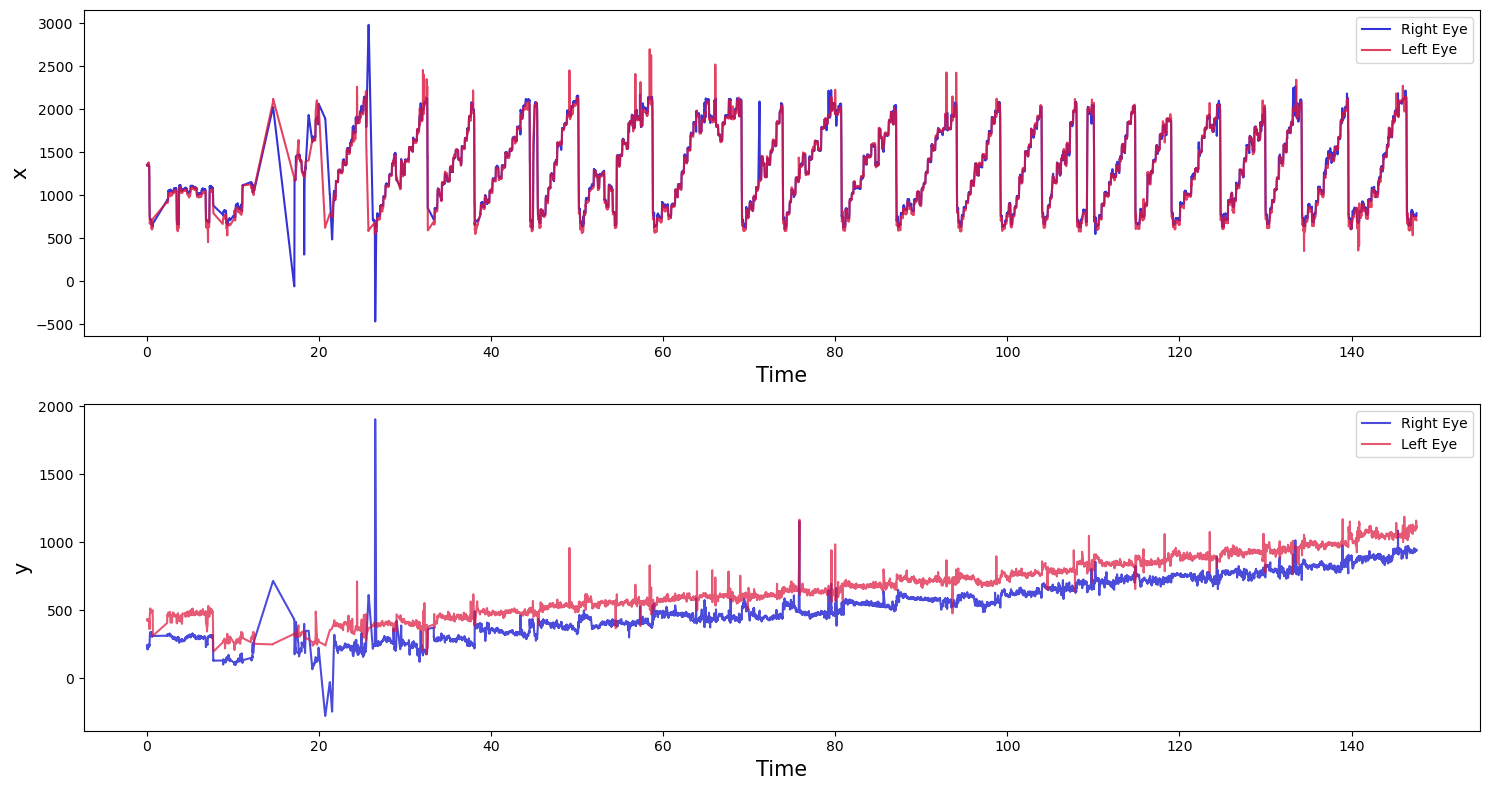

In [12]:
f, axes = plt.subplots(2, 1, figsize=(15, 8))

axes[0].plot(eyes['t'], eyes['x_right'], c='mediumblue', alpha=0.8, label='Right Eye')
axes[0].plot(eyes['t'], eyes['x_left'], c='crimson', alpha=0.8, label='Left Eye')
axes[0].set_ylabel('x', fontsize=15)


axes[1].plot(eyes['t'], eyes['y_right'], c='mediumblue', alpha=0.7, label='Right Eye')
axes[1].plot(eyes['t'], eyes['y_left'], c='crimson', alpha=0.7, label='Left Eye')
axes[1].set_ylabel('y', fontsize=15)
    
for ax in axes:
    ax.set_xlabel('Time', fontsize=15)
    ax.legend()
plt.tight_layout()
plt.show()

In [13]:
last = gaze["Label"][0]
textfiles = [un[0], un[3],un[6] ,un[9] ,un[12], un[15]]
changes = []
skimming_parts = []
index = 0

for i, j in zip(gaze["Label"], gaze["text_file"]):
    if i != "Immersive" and j in textfiles:
        
        changes.append(gaze.loc[index])
        
    elif len(changes) > 0:
        
        skimming_parts.append(changes)
        changes = []
   
    index = index + 1


In [14]:
for i in range(len(skimming_parts)):
    skimming_parts[i] = pd.DataFrame(skimming_parts[i])
    skimming_parts[i].reset_index(drop=True, inplace=True)
    skimming_parts[i]["device_time_stamp"] = skimming_parts[i]["device_time_stamp"] - skimming_parts[i]["device_time_stamp"][0]
     

In [15]:
imerserive_parts = [im_HC_AI ,
im_HC_OR ,
im_SK_AI ,
im_SK_OR ,
im_KB_AI ,
im_KB_OR ]

In [16]:
part = 9
left_x = skimming_parts[part]['left_gaze_point_on_display_area_x']*2560
left_y = skimming_parts[part]['left_gaze_point_on_display_area_y']*1440
right_x = skimming_parts[part]['right_gaze_point_on_display_area_x']*2560
right_y = skimming_parts[part]['right_gaze_point_on_display_area_y']*1440
t = skimming_parts[part]['device_time_stamp']
eyes = pd.DataFrame({'t': t, 'x_right': right_x, 'x_left': left_x, 'y_right': right_y, 'y_left': left_y}).dropna()
eyes

,t,x_right,x_left,y_right,y_left
0,0.000000,936.976089,958.459015,564.919739,695.992856
1,0.011367,929.516144,960.568924,564.582896,736.378384
2,0.021906,927.194214,970.893555,566.447225,739.316626
3,0.033327,928.817673,970.893555,568.695087,739.316626
4,0.045106,932.976074,953.159561,571.378713,728.430290
...,...,...,...,...,...
253,2.831236,1059.030151,1041.667938,585.426450,750.346727
254,2.842492,1028.479385,1022.340927,577.608647,766.391659
255,2.853835,972.811890,959.172516,646.506786,739.720459
256,2.864019,987.856903,959.172516,612.218070,739.720459


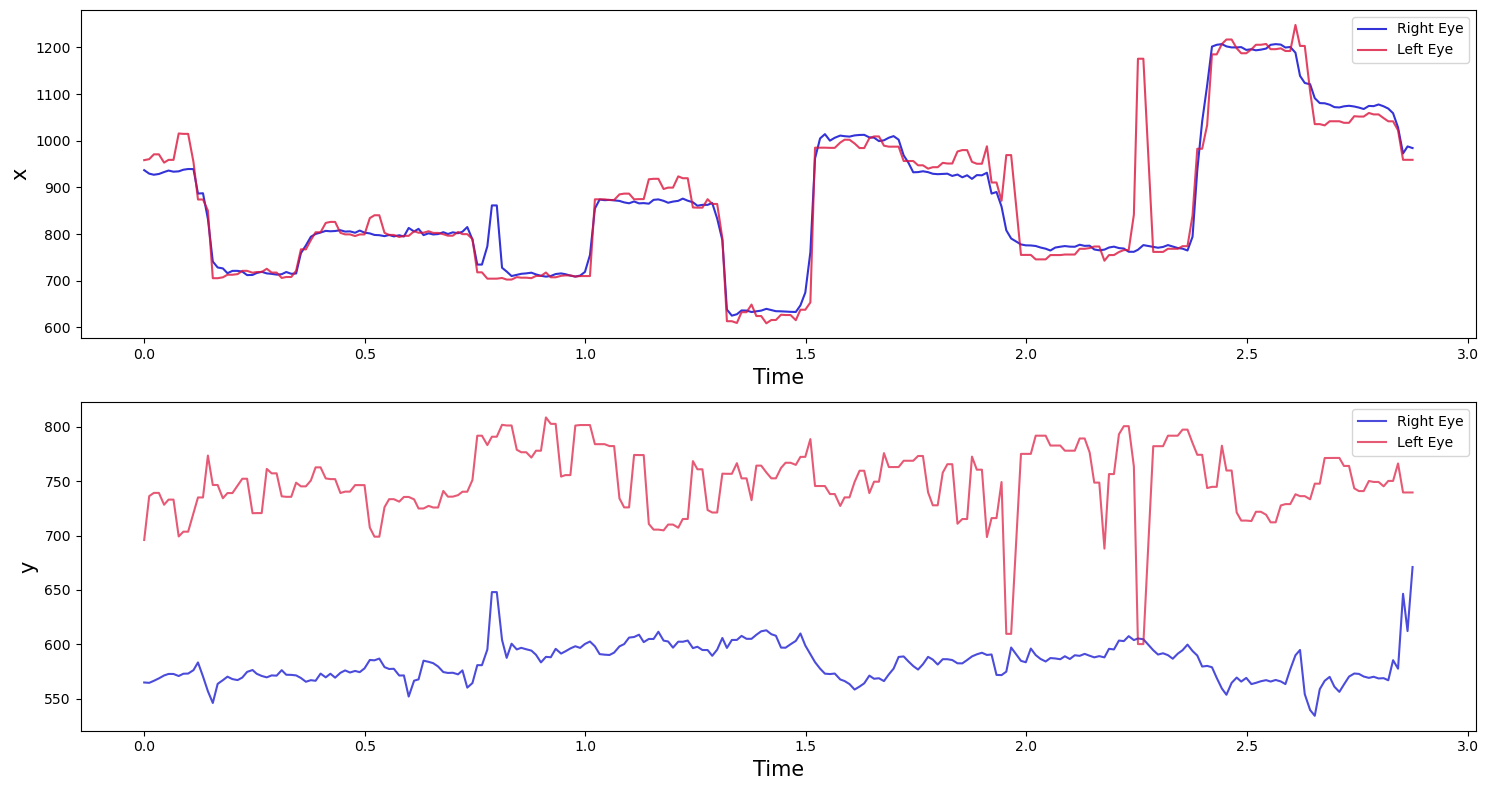

In [17]:
f, axes = plt.subplots(2, 1, figsize=(15, 8))

axes[0].plot(eyes['t'], eyes['x_right'], c='mediumblue', alpha=0.8, label='Right Eye')
axes[0].plot(eyes['t'], eyes['x_left'], c='crimson', alpha=0.8, label='Left Eye')
axes[0].set_ylabel('x', fontsize=15)


axes[1].plot(eyes['t'], eyes['y_right'], c='mediumblue', alpha=0.7, label='Right Eye')
axes[1].plot(eyes['t'], eyes['y_left'], c='crimson', alpha=0.7, label='Left Eye')
axes[1].set_ylabel('y', fontsize=15)
    
for ax in axes:
    ax.set_xlabel('Time', fontsize=15)
    ax.legend()
plt.tight_layout()
plt.show()


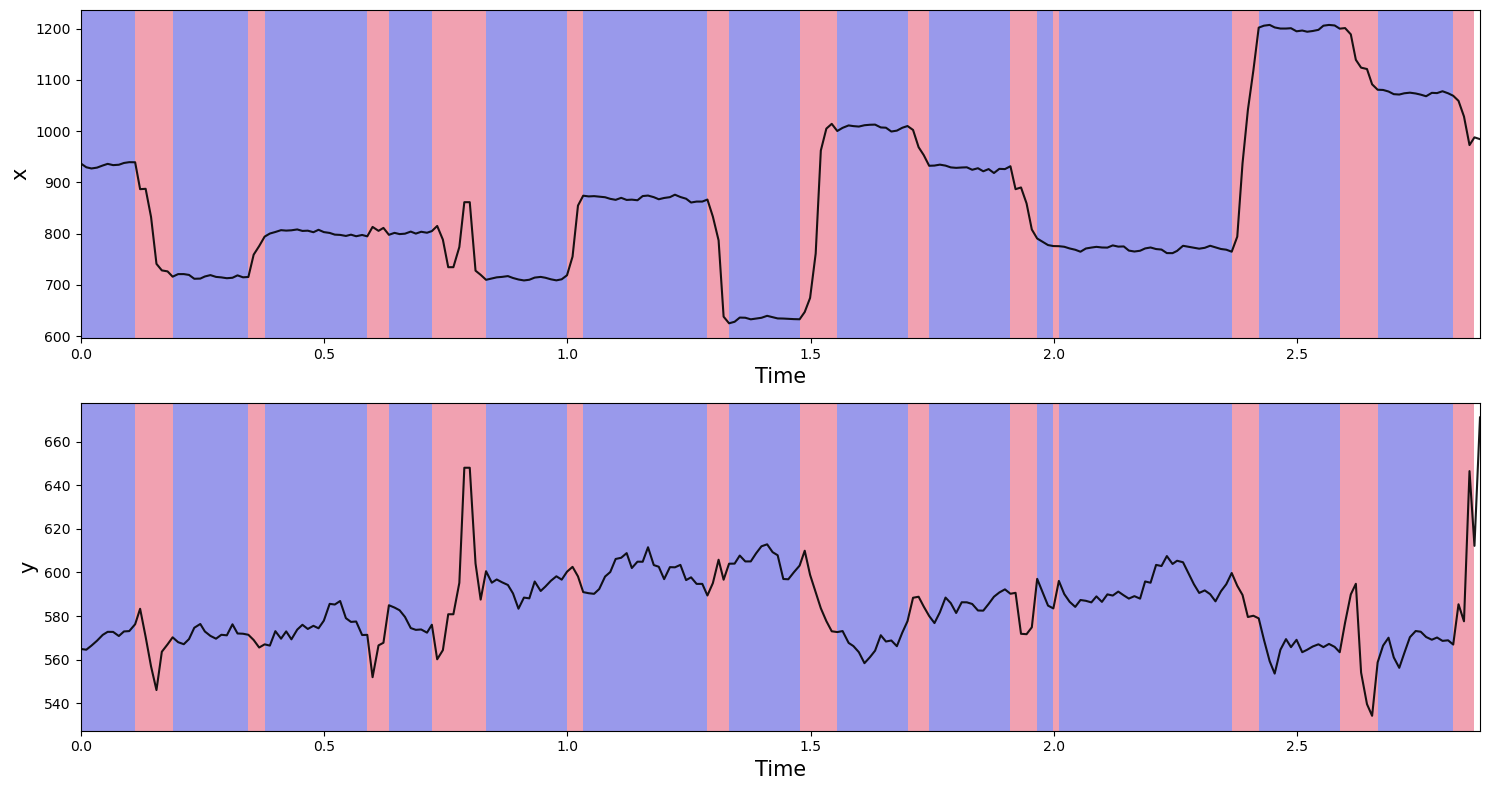

In [18]:
t = eyes['t']
x = eyes['x_right']
y = eyes['y_right']

classifier = IHMM(t, x, y, threshold=1000, n_iter = 19)
classifier.process()
classifier.plot()

In [19]:
skim_data = []
for i in range(len(skimming_parts)):
    part = i
    left_x = skimming_parts[part]['left_gaze_point_on_display_area_x']*2560
    left_y = skimming_parts[part]['left_gaze_point_on_display_area_y']*1440
    right_x = skimming_parts[part]['right_gaze_point_on_display_area_x']*2560
    right_y = skimming_parts[part]['right_gaze_point_on_display_area_y']*1440
    t = skimming_parts[part]['device_time_stamp']
    round = pd.DataFrame({'t': t, 'x_right': right_x, 'x_left': left_x, 'y_right': right_y, 'y_left': left_y}).dropna()
    
    t = round['t']
    x = round['x_right']
    y = round['y_right']

    classifier = IHMM(t, x, y, threshold=1000, n_iter = 19)
    classifier.process()
    fix = pd.DataFrame(classifier.fixations, columns=['fixations'])
    round = skimming_parts[i].merge(fix, left_index=True, right_index=True)
    skim_data.append(round)


IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.



In [20]:
skim_data[0]

,device_time_stamp,left_gaze_origin_validity,right_gaze_origin_validity,left_gaze_origin_in_user_x,left_gaze_origin_in_user_y,left_gaze_origin_in_user_z,right_gaze_origin_in_user_x,right_gaze_origin_in_user_y,right_gaze_origin_in_user_z,left_gaze_origin_in_trackbox_x,...,right_pupil_diameter,Reading,text_file,passage_index,font_size,font_name,Author,AI,Label,fixations
0,0.000000,1,1,-82.468399,95.504494,675.192810,-22.257700,101.826447,680.844543,0.676191,...,3.170715,True,AI_HC_P02_text.txt,2.0,20.0,Times New Roman,HC,False,Skimming,1
1,0.010877,1,1,-82.468399,95.504494,675.192810,-22.243378,101.903831,680.841736,0.676191,...,3.177231,True,AI_HC_P02_text.txt,2.0,20.0,Times New Roman,HC,False,Skimming,1
2,0.022692,1,1,-82.455551,95.593292,675.189880,-22.238733,101.963875,680.844116,0.676162,...,3.168716,True,AI_HC_P02_text.txt,2.0,20.0,Times New Roman,HC,False,Skimming,1
3,0.033421,1,1,-82.444672,95.788406,675.549255,-22.187214,102.106140,681.130310,0.676043,...,3.164871,True,AI_HC_P02_text.txt,2.0,20.0,Times New Roman,HC,False,Skimming,1
4,0.044513,1,1,-82.444672,95.788406,675.549255,-22.146696,102.092880,681.081970,0.676043,...,3.159897,True,AI_HC_P02_text.txt,2.0,20.0,Times New Roman,HC,False,Skimming,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,6.731245,1,1,-73.744720,99.844963,672.382202,-14.020792,104.148964,677.004761,0.658268,...,3.162399,True,AI_HC_P02_text.txt,2.0,20.0,Times New Roman,HC,False,Skimming,0
510,6.742535,1,1,-73.744720,99.844963,672.382202,-13.841412,104.221886,677.410339,0.658268,...,3.205704,True,AI_HC_P02_text.txt,2.0,20.0,Times New Roman,HC,False,Skimming,0
511,6.754498,1,1,-73.669731,99.907883,672.607422,-13.680371,104.266853,677.787231,0.658056,...,3.234421,True,AI_HC_P02_text.txt,2.0,20.0,Times New Roman,HC,False,Skimming,0
512,6.764471,1,1,-73.478569,100.104233,673.361023,-13.680371,104.266853,677.787231,0.657473,...,3.234421,True,AI_HC_P02_text.txt,2.0,20.0,Times New Roman,HC,False,Skimming,0


In [21]:
im_data = []
for i in range(len(imerserive_parts)):
    part = i
    left_x = imerserive_parts[part]['left_gaze_point_on_display_area_x']*2560
    left_y = imerserive_parts[part]['left_gaze_point_on_display_area_y']*1440
    right_x = imerserive_parts[part]['right_gaze_point_on_display_area_x']*2560
    right_y = imerserive_parts[part]['right_gaze_point_on_display_area_y']*1440
    t = imerserive_parts[part]['device_time_stamp']
    round = pd.DataFrame({'t': t, 'x_right': right_x, 'x_left': left_x, 'y_right': right_y, 'y_left': left_y}).dropna()
    
    t = round['t']
    x = round['x_right']
    y = round['y_right']

    classifier = IHMM(t, x, y, threshold=1000, n_iter = 19)
    classifier.process()
    fix = pd.DataFrame(classifier.fixations, columns=['fixations'])
    round = imerserive_parts[i].merge(fix, left_index=True, right_index=True)
    im_data.append(round)

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.



In [22]:
im_data[0]

,device_time_stamp,left_gaze_origin_validity,right_gaze_origin_validity,left_gaze_origin_in_user_x,left_gaze_origin_in_user_y,left_gaze_origin_in_user_z,right_gaze_origin_in_user_x,right_gaze_origin_in_user_y,right_gaze_origin_in_user_z,left_gaze_origin_in_trackbox_x,...,right_pupil_diameter,Reading,text_file,passage_index,font_size,font_name,Author,AI,Label,fixations
0,0.000000,1,1,-67.435303,93.269669,678.528198,-6.059029,95.078049,682.080322,0.643760,...,3.648132,True,AI_HC_P02_text.txt,2.0,20.0,Times New Roman,HC,False,Immersive,0
1,0.010529,1,1,-67.437004,93.267380,678.519043,-6.091819,95.096924,682.125671,0.643766,...,3.633789,True,AI_HC_P02_text.txt,2.0,20.0,Times New Roman,HC,False,Immersive,0
2,0.021817,1,1,-67.452049,93.310112,678.629089,-6.101979,95.142326,682.237000,0.643774,...,3.635651,True,AI_HC_P02_text.txt,2.0,20.0,Times New Roman,HC,False,Immersive,1
3,0.031837,1,1,-67.470627,93.487885,679.088623,-6.070941,95.290947,682.572632,0.643714,...,3.618423,True,AI_HC_P02_text.txt,2.0,20.0,Times New Roman,HC,False,Immersive,1
4,0.043686,1,1,-67.464256,93.502625,679.050964,-6.041544,95.344803,682.602661,0.643708,...,3.608734,True,AI_HC_P02_text.txt,2.0,20.0,Times New Roman,HC,False,Immersive,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4071,46.502273,1,1,-61.323536,94.674057,674.316589,0.083050,94.980469,677.167175,0.631653,...,3.006241,True,AI_HC_P02_text.txt,2.0,20.0,Times New Roman,HC,False,Immersive,1
4072,46.512790,1,1,-61.296379,94.693481,674.342224,0.122162,94.994484,677.195801,0.631591,...,2.999283,True,AI_HC_P02_text.txt,2.0,20.0,Times New Roman,HC,False,Immersive,1
4073,46.524319,1,1,-61.276985,94.689941,674.279846,0.136893,94.988403,677.130493,0.631561,...,2.989548,True,AI_HC_P02_text.txt,2.0,20.0,Times New Roman,HC,False,Immersive,1
4074,46.535367,1,1,-61.236008,94.672897,674.169006,0.163757,94.974495,677.030273,0.631496,...,2.983780,True,AI_HC_P02_text.txt,2.0,20.0,Times New Roman,HC,False,Immersive,1


In [23]:
columns_to_drop = ['Reading', 'text_file', 'passage_index', 'AI', 'Label']

# Drop the columns and assign the result to a new DataFrame
for i in range(len(im_data)):
    im_data[i] = im_data[i].drop(columns=columns_to_drop)
for i in range(len(skim_data)):
    skim_data[i] = skim_data[i].drop(columns=columns_to_drop)

In [24]:
y_label = []
x_data = []
for i in range(len(im_data)):
    y_label.append("immersive")
    x_data.append(im_data[i])
for i in range(len(skim_data)):
    y_label.append("skimming")
    x_data.append(skim_data[i])

In [25]:
combined_dataframe = pd.concat(x_data, ignore_index=True)

# Save the combined DataFrame to a CSV file
combined_dataframe.to_csv(f'x_data_{testperson}.csv', index=False)
np.savetxt(f"y_label_{testperson}.csv", y_label, fmt='%s', delimiter=",")
